In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.tools import plotting
import urllib.request
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器
from sklearn import cross_validation as cv

In [3]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/pima-indians-diabetes.txt'
urllib.request.urlretrieve(url, 'tounyou.txt')

('tounyou.txt', <http.client.HTTPMessage at 0x10976e400>)

In [59]:
df = pd.read_csv('tounyou.txt', sep=',')

In [60]:
df

,NumTimePreg,OralGluTol,BloodPres,SkinThick,SerumInsulin,BMI,PedigreeFunc,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [61]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9, 
            ...
            758, 759, 760, 761, 762, 763, 764, 765, 766, 767],
           dtype='int64', length=768)

In [62]:
df.index = list(range(1, len(df.index)+1))

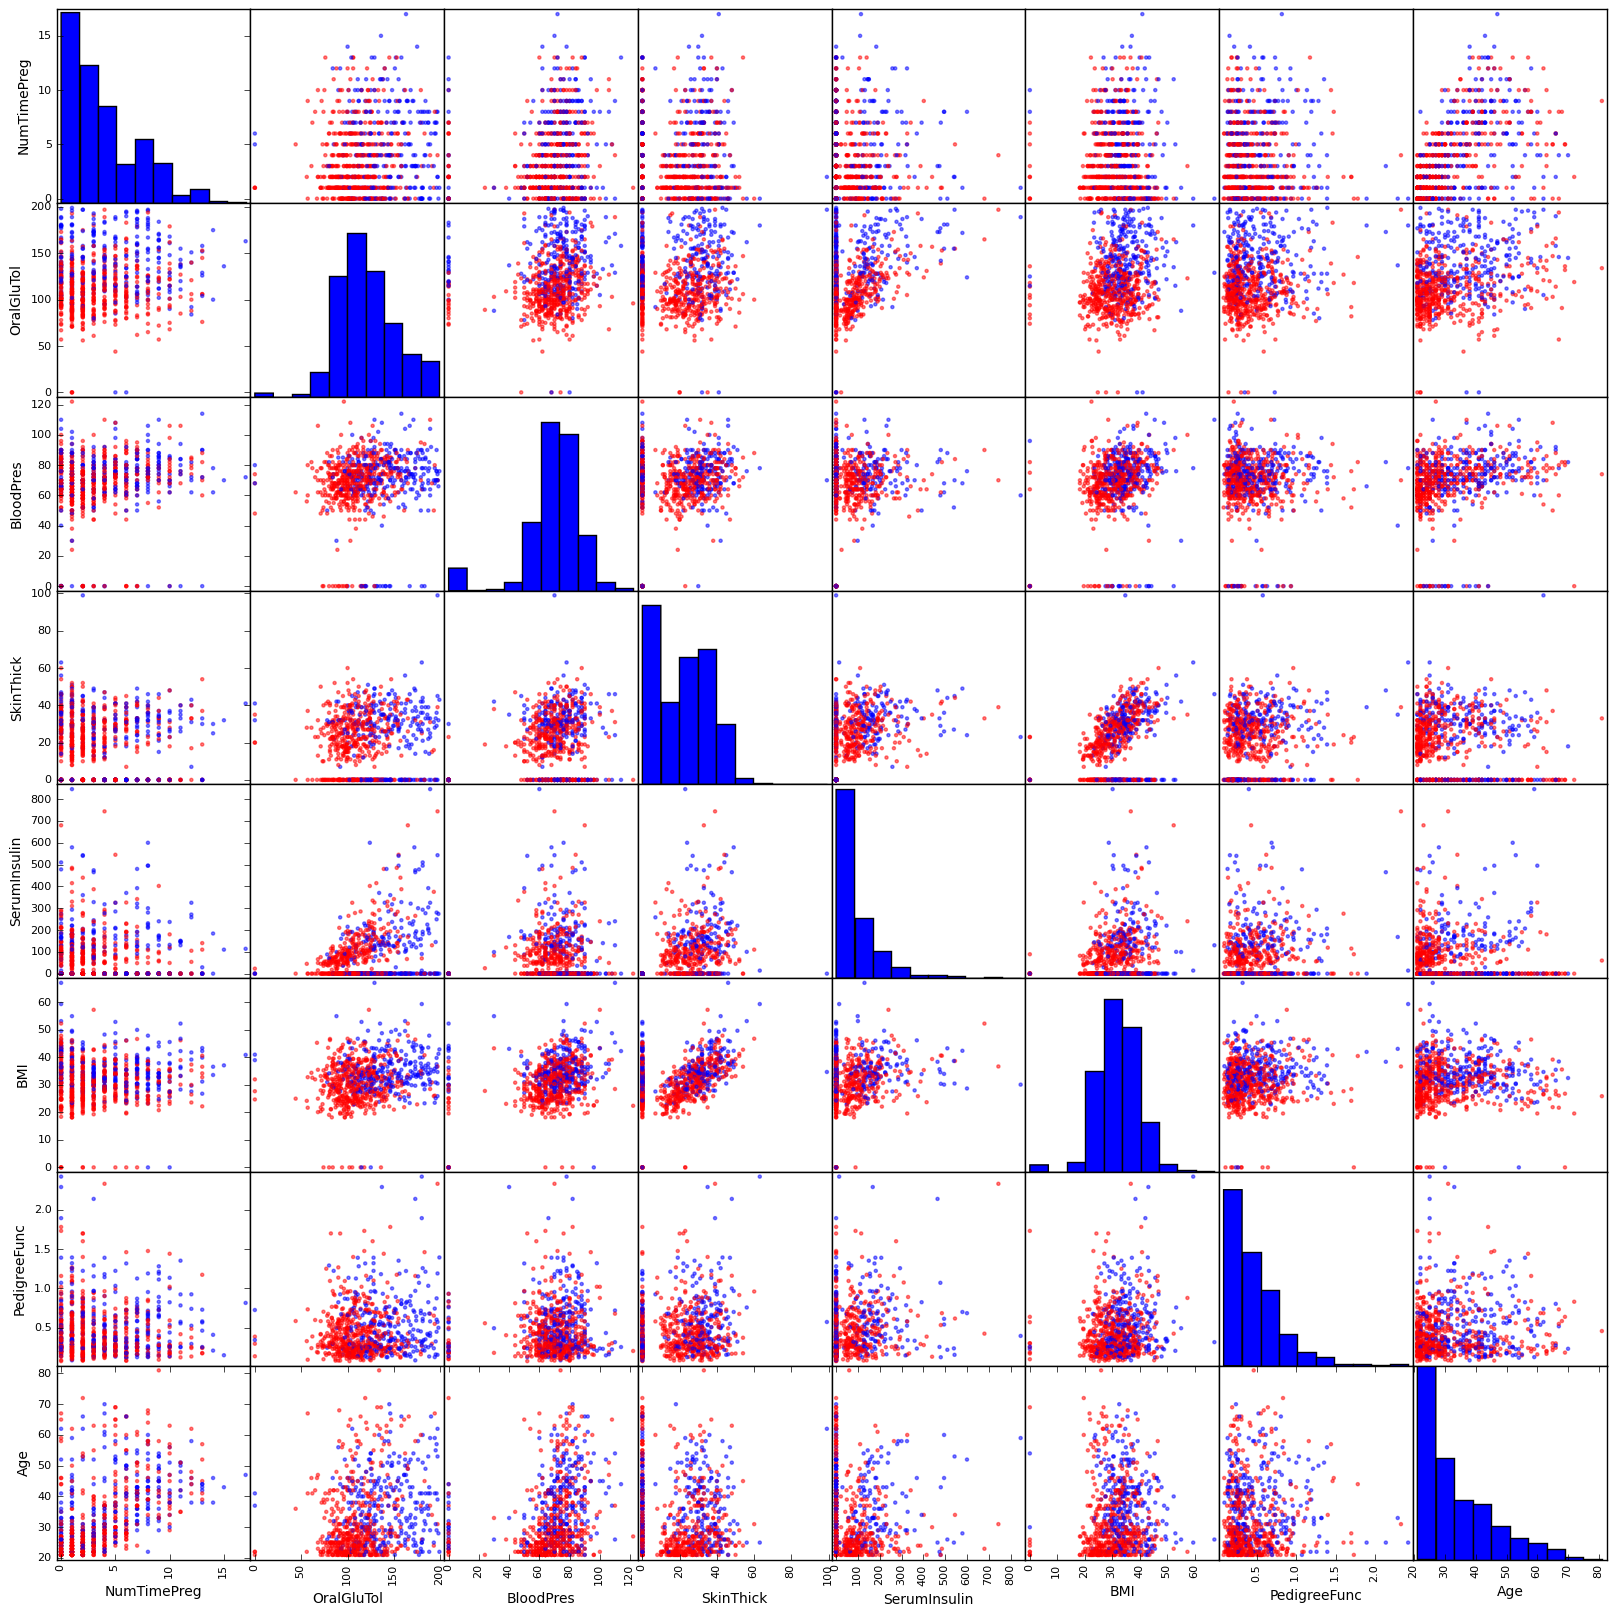

In [63]:
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -1]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -1])]
plotting.scatter_matrix(df[list(df.columns[:-1])], figsize=(20, 20), color=colors) 
plt.show()

In [64]:
# 行列の正規化
dfs = df.iloc[:, :-1].apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

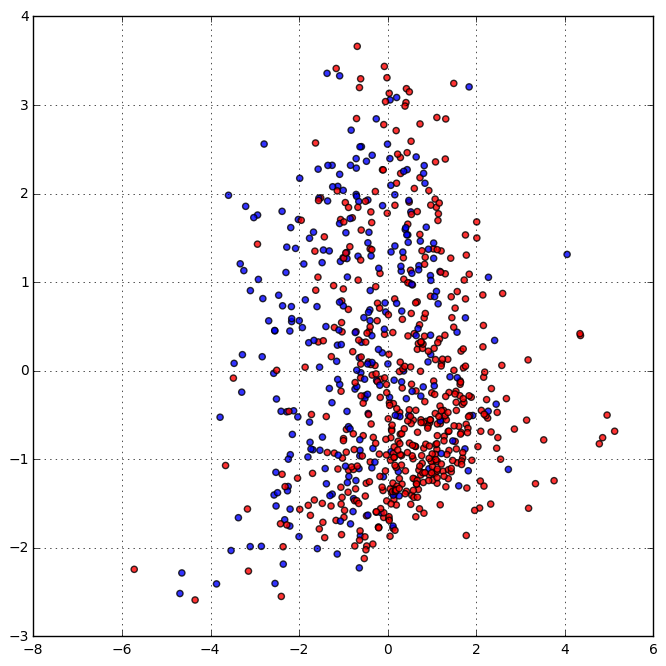

In [65]:
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -1]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -1])]
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, "", alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=colors)
plt.grid()
plt.show()

赤が健康者、青が糖尿病患者  
糖尿病患者とそうでない人で色を変えたが、両者を分離することは難しそうである。

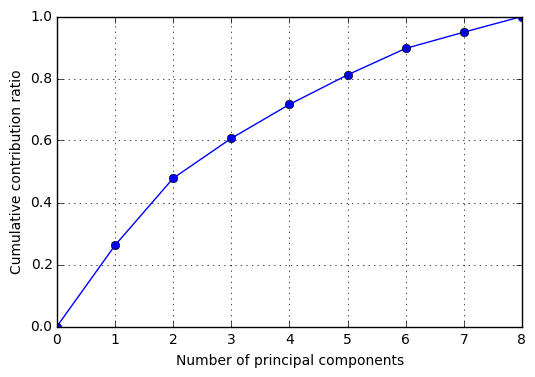

In [66]:
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

主成分分析をしても、多くを占める主成分と元々の成分の数があまり変わらないため、あまり有益な情報は得られなさそうである。

In [67]:
feature_names = df.columns[:-1]
target_names = list(set(df.iloc[:, -1]))
sample_names = df.index
data = df.iloc[:, :-1]
target = df.iloc[:, -1]

In [68]:
train_data, test_data, train_target, test_target = cv.train_test_split(data, target, test_size=0.85)

In [69]:
train_data

,NumTimePreg,OralGluTol,BloodPres,SkinThick,SerumInsulin,BMI,PedigreeFunc,Age
269,0,102,52,0,0,25.1,0.078,21
11,4,110,92,0,0,37.6,0.191,30
709,9,164,78,0,0,32.8,0.148,45
282,10,129,76,28,122,35.9,0.280,39
509,2,84,50,23,76,30.4,0.968,21
167,3,148,66,25,0,32.5,0.256,22
706,6,80,80,36,0,39.8,0.177,28
729,2,175,88,0,0,22.9,0.326,22
372,0,118,64,23,89,0.0,1.731,21
222,2,158,90,0,0,31.6,0.805,66


In [70]:
# 様々なパラメータ（ハイパーパラメータという）で学習し、分離性能の最も良いモデルを選択する。
parameters = [
    {'kernel': ['linear'], 'C': [1]},
    {'kernel': ['rbf'],     'C': [1], 'gamma': [1e-2]},      
    {'kernel': ['poly'],'C': [1], 'degree': [2]}]

In [71]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
from sklearn import grid_search

# train_data を使って、SVM による学習を行う
gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=-1).fit(train_data, train_target)
# 分離性能の最も良かったモデルが何だったか出力する
print(gs.best_estimator_)

# モデル構築に使わなかったデータを用いて、予測性能を評価する
pred_target = gs.predict(test_data)
print ("Accuracy_score:{0}".format(accuracy_score(test_target, pred_target)))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy_score:0.7565084226646248
elapsed_time:66.71774101257324


複数のパラメータで試そうとすると動かなくなるためパラメーターの数を絞った。  
さらに教師セットを大きくとると非常に時間がかかるため、教師セットを15%に設定した。  
精度が70%ほどである。  

In [72]:
df = pd.DataFrame(columns=['test', 'pred'])
df['test'] = test_target
df['pred'] = pred_target
df.T

,727,619,498,457,670,121,293,107,391,651,...,16,94,562,667,424,535,522,300,454,735
test,0,1,0,0,0,1,1,0,0,0,...,1,1,1,1,0,0,0,0,0,0
pred,0,0,0,1,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target, pred_target)
print(pd.DataFrame(cm))

     0    1
0  380   53
1  106  114


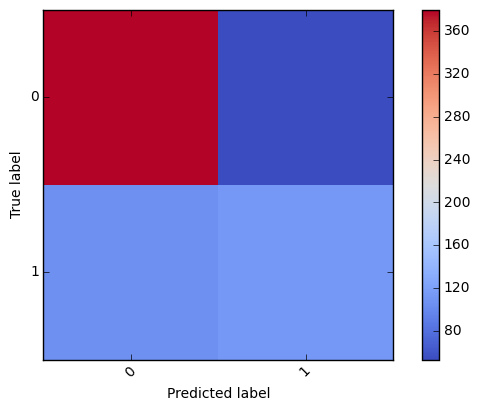

In [74]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

糖尿病患者に警告できる確率は50%ほどであり、非糖尿病患者に対し糖尿病と誤診する確率が10%ほどある。  
今回のデータセットを用いて糖尿病患者を診断するのは難しいと考える。